# Off-Platform Project: Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data we have available to us.

* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

In [1]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.


11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…


# Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; we'll need to make it ourselves.

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. This can be found using the feature `"retweet_count"`. Let's say we wanted to create a column called `is_viral` that is a `1` if the tweet had more than `5` retweets and `0` otherwise.
Instead of using `5` as the benchmark for a viral tweet, let's use the median number of retweets.

In [3]:
import numpy as np
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > all_tweets['retweet_count'].median(), 1, 0)
print(all_tweets['is_viral'].value_counts())

0    5562
1    5537
Name: is_viral, dtype: int64


# Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features. 

In [10]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis = 1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis = 1)
all_tweets['hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)
all_tweets['links'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis = 1)

# Normalizing The Data

We've now made the columns that we want to feed into our classifier. Let's get rid of all the data that is no longer relevant. 
The scale function will normalize the data so all of the features will vary within the same range.


In [14]:
from sklearn.preprocessing import scale
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count']]
scaled_data = scale(data, axis = 0)
scaled_data[0]

array([ 0.6164054 , -0.02878298, -0.14483305])

# Creating the Training Set and Test Set

To evaluate the effectiveness of our classifier, we split our data

In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

# Using the Classifier

We can finally use the K-Nearest Neighbor classifier. Let's test it using `k = 5`.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

0.5882882882882883

# Choosing K

We've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 



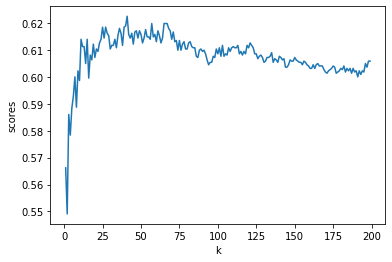

In [20]:
import matplotlib.pyplot as plt
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
plt.plot(range(1, 200), scores)
plt.xlabel('k')
plt.ylabel('scores')
plt.show()

# Explore on your own

We can see the classifier gets better as `k` increases, but as `k` gets too high, underfitting starts to happen.
Lets see if we  can find some different features that perform better?


In [21]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis = 1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis = 1)
all_tweets['hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)
all_tweets['links'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis = 1)

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'hashtags', 'links']]
scaled_data = scale(data, axis = 0)

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

0.7175675675675676

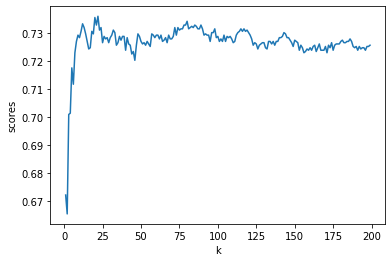

In [22]:
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
plt.plot(range(1, 200), scores)
plt.xlabel('k')
plt.ylabel('scores')
plt.show()